<IPython.core.display.Javascript object>


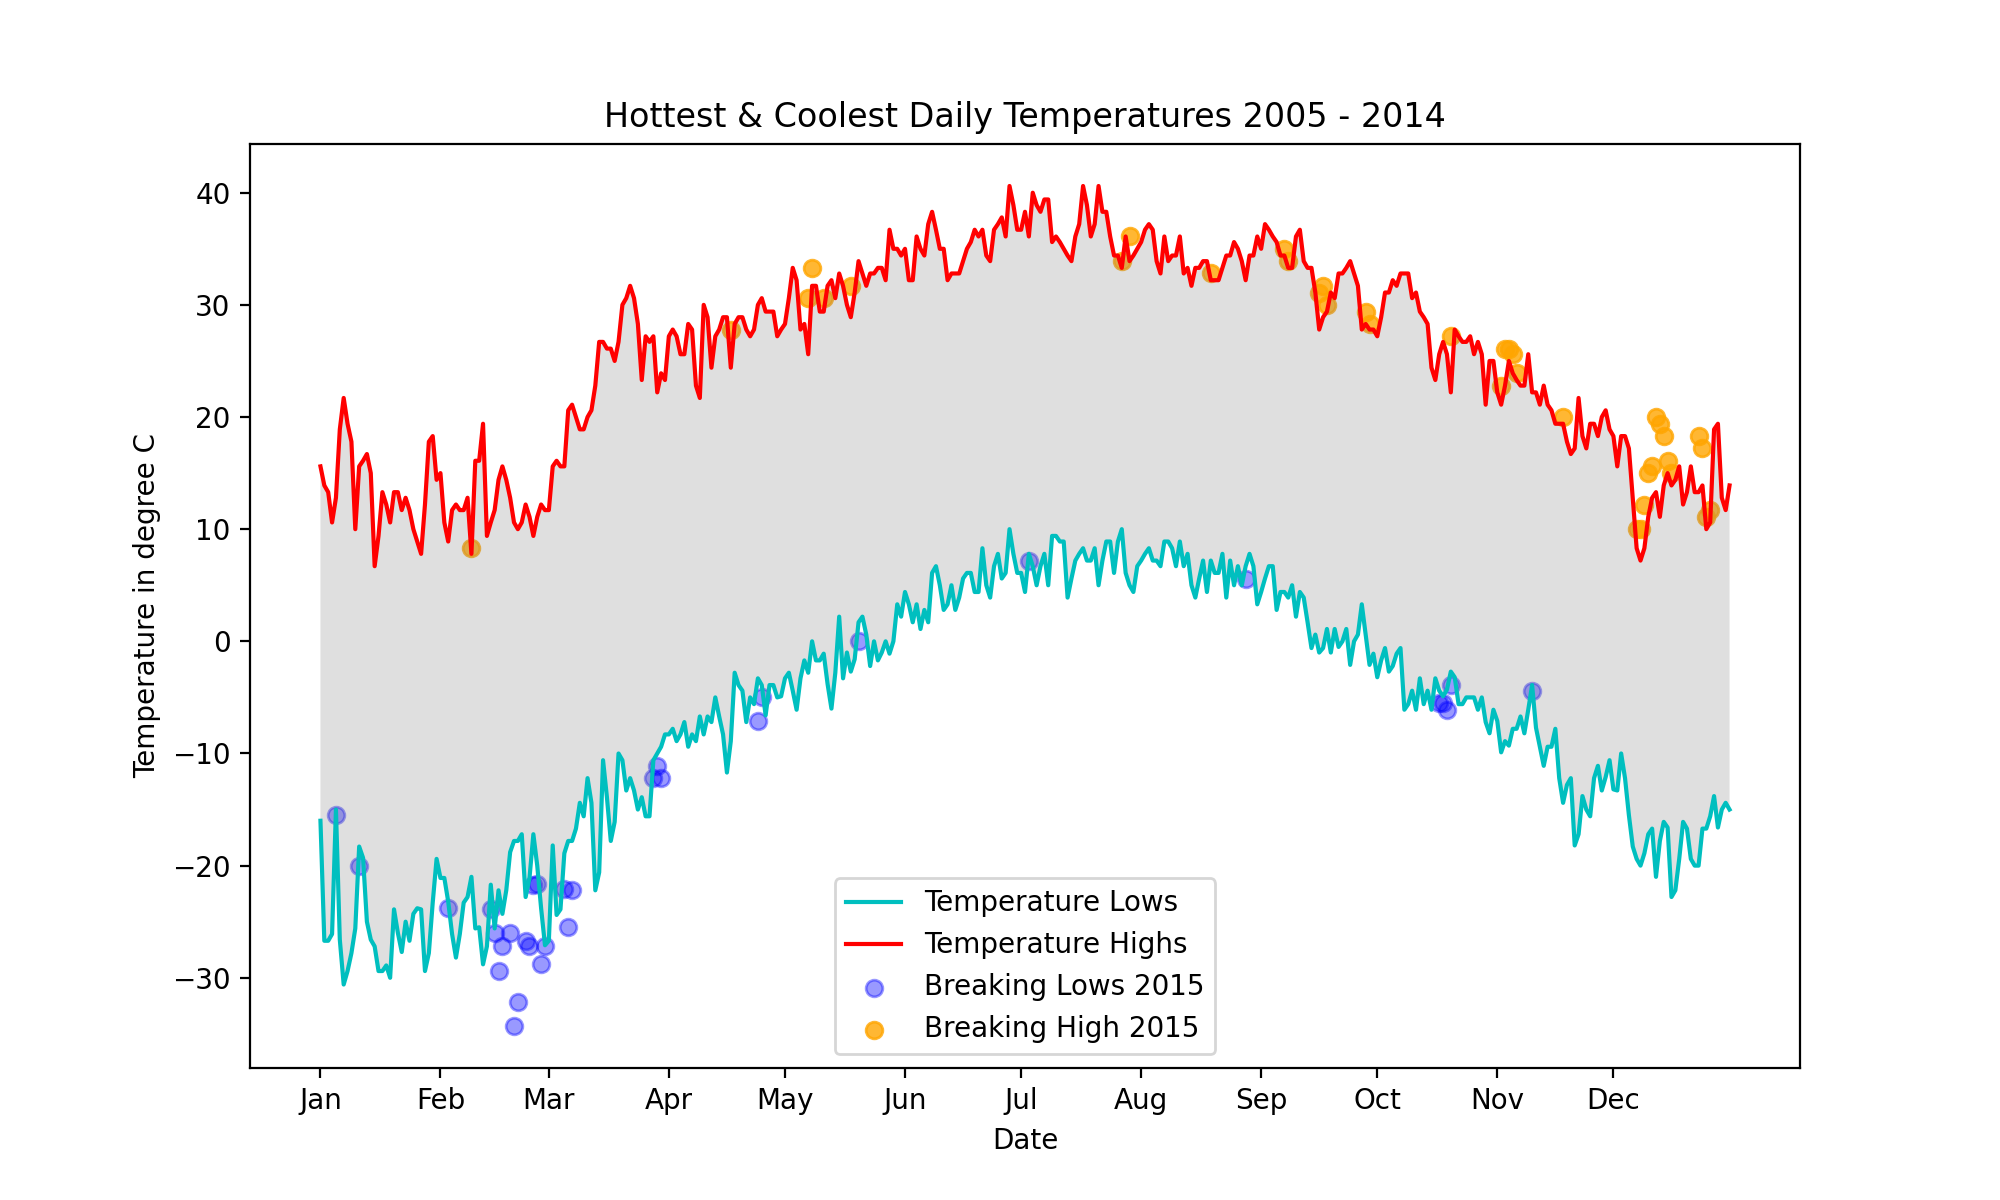

In [212]:
%matplotlib notebook 
import matplotlib as mpl 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import calendar

file = pd.read_csv('/Users/emilyvincett/Downloads/weather.csv')
file = file.sort_values('Date', ascending=True)
file = file.reset_index(drop=True)
file2 = file.copy()

#Trim to 2014
file2 = file2[file2['Date']<='2014-12-31']

#Remove Feb 29/2008 
file2 = file2[(file2['Date']!='2008-02-29')]

#Remove Feb 29/2012
file2 = file2[(file2['Date']!='2012-02-29')]

# Convert to actual temps 
file2['Data_Value'] = file2['Data_Value']/10
new = file2['Date'].str.split('-',n=2,expand=True)
file2['Month'] = new[1]
file2['Day']=new[2]
file2['Year'] = new[0]

# Create y - axes for line plot 
low_temp = file2[file2['Element'].str.match('TMIN')].groupby(['Month','Day']).min()['Data_Value']
high_temp = file2[file2['Element'].str.match('TMAX')].groupby(['Month','Day']).max()['Data_Value']

file3 = file.copy() 
file3['Data_Value'] = (file3['Data_Value']/10)
file3 = file3[file3['Date']>='2015-01-01']
new = file3['Date'].str.split('-',n=2,expand=True)
file3['Year'] = new[0]
file3['Month'] = new[1]
file3['Day'] = new[2]

# Low temperatures for 2015 
low_temp_2015 = file3[file3['Element'].str.match('TMIN')].groupby(['Month','Day']).min()['Data_Value']
low_temp_2015_df = low_temp_2015.to_frame()
low_temp_2015_df = low_temp_2015_df.reset_index()
low_temp_2015_df['Date'] = low_temp_2015_df['Month'] + '-' + low_temp_2015_df['Day']
low_temp_2015_df.drop(['Month','Day'],axis=1,inplace=True)
#low_temp_2015_df.reset_index(drop=True)
#low_temp_2015_df = low_temp_2015_df.set_index('Date')

# Low temperatures for 2015 merged to previous years lows
low_temp_prevyrs_to_2015 = low_temp_df.merge(low_temp_2015_df, left_on='Date', right_on='Date')
low_temp_prevyrs_to_2015.rename({'Data_Value_x':'Previous Years','Data_Value_y':'2015'},axis=1,inplace=True)
breaking_lows = low_temp_prevyrs_to_2015[low_temp_prevyrs_to_2015['2015']< low_temp_prevyrs_to_2015['Previous Years']]
breaking_lows

# High Temperatures for 2015
high_temp_2015 = file3[file3['Element'].str.match('TMAX')].groupby(['Month','Day']).max()['Data_Value']
high_temp_2015_df = high_temp_2015.to_frame()
high_temp_2015_df = high_temp_2015_df.reset_index()
high_temp_2015_df['Date'] = high_temp_2015_df['Month'] + '-' + high_temp_2015_df['Day']
high_temp_2015_df.drop(['Month','Day'],axis=1,inplace=True)


# High Temperatures for 2015 merged tp previous years highs
high_temp_df = high_temp.to_frame()
high_temp_df = high_temp_df.reset_index()
high_temp_df['Date'] = high_temp_df['Month'] + '-' + high_temp_df['Day']
high_temp_df.drop(['Month','Day'],axis=1,inplace=True)
high_temp_prevyrs_to_2015 = high_temp_df.merge(high_temp_2015_df, left_on='Date', right_on='Date')
high_temp_prevyrs_to_2015.rename({'Data_Value_x':'Previous Years','Data_Value_y':'2015'},axis=1,inplace=True)
breaking_highs = high_temp_prevyrs_to_2015[high_temp_prevyrs_to_2015['2015']>high_temp_prevyrs_to_2015['Previous Years']]
breaking_highs

x = np.arange(0, 365)
x_ticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
cumsum = np.cumsum(days_in_month)
position = np.subtract(cumsum,days_in_month)

plt.figure(figsize=(10,6))
plt.plot(x,low_temp,'-c',label='Temperature Lows')
plt.plot(x,high_temp,'-r',label='Temperature Highs')
plt.scatter(breaking_lows.index,breaking_lows['2015'],c='blue', alpha=0.4,label="Breaking Lows 2015")
plt.scatter(breaking_highs.index,breaking_highs['2015'],c='orange',alpha=0.8,label="Breaking High 2015")
plt.title('Hottest & Coolest Daily Temperatures 2005 - 2014')
plt.ylabel('Temperature in degree C')
plt.xlabel('Date')
plt.legend(loc='lower center' )
plt.xticks(position,x_ticks_labels)
plt.gca().fill_between(range(len(low_temp)),low_temp,high_temp, facecolor='grey',alpha=0.25)


